---
Iniciamos con el EDA 
---

Refiero al final del NoteBook, miscelaneos, funciones y experimentos que se realizaron durante el proyecto. A modo de documentación

#Importamos primero las librerías que vamos a utilizar#

In [82]:
#Importamos las libreríasa  utilizar
import datetime
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import json 
import warnings 
import os 
import pyarrow as pa
import pyarrow.parquet as pq
import re
import ast 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


Comenzamos por armar el data frame y explorarlo, buscando datos nulos y repetidos 

In [83]:
df=pd.read_parquet("../DataSets/steam_games.parquet")
df2=pd.read_parquet("../DataSets/user_review.parquet")
df3=pd.read_parquet("../DataSets/user_items.parquet")

Iniciamos con la exploración del primer archivo, steam_games. Por cuestiones de optimización, se decidió utilizar los tres archivos en la exploración

In [84]:
df.head() #Se carga el primer dataframe

,publisher,genres,title,release_date,tags,specs,price,early_access,id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
1,Kotoshiro,Casual,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
2,Kotoshiro,Indie,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
3,Kotoshiro,Simulation,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
4,Kotoshiro,Strategy,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro


## Se usaron las siguientes funciones con la finalidad de llenar los valores nulos con datos y describir de manera optima el archivo

In [85]:
# Limpieza de Datos Nulos
def clean_missing_data(data):
    cleaned_data = data.dropna()
    return cleaned_data

# Tratamiento de Datos Nulos
def fill_missing_data(data, column, value):
    data[column].fillna(value, inplace=True)
    return data


def extraer_anio(fecha): 
    if '-' in fecha:  # Si el formato es 'YYYY-MM-DD'
        return fecha.split('-')[0]
    else:  
        partes = fecha.split(' ')
        if len(partes) == 2:
            return partes[1]
    return fecha

In [16]:
df['release_date'] = df['release_date'].apply(extraer_anio)
# Normalizo los ultimos datos de la columna release_date
df['release_date'] = df['release_date'].replace('SOON™',2019)
df['release_date'] = df['release_date'].replace('soon',2019)
df['release_date'] = df['release_date'].replace('SOON',2019)


In [17]:
# Convierto la columna release_date de valores str a int
df['release_date'] = df['release_date'].astype(int)

In [18]:
#Comenzamos por tratar los datos nulos de nueva cuenta
clean_missing_data(df)

,publisher,genres,title,release_date,tags,specs,price,early_access,id,developer
0,Kotoshiro,Action,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
1,Kotoshiro,Casual,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
2,Kotoshiro,Indie,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
3,Kotoshiro,Simulation,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
4,Kotoshiro,Strategy,Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",['Single-player'],4.99,False,761140,Kotoshiro
...,...,...,...,...,...,...,...,...,...,...
67479,Laush Studio,Indie,Russian Roads,2018,"['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,Laush Dmitriy Sergeevich
67480,Laush Studio,Racing,Russian Roads,2018,"['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,Laush Dmitriy Sergeevich
67481,Laush Studio,Simulation,Russian Roads,2018,"['Indie', 'Simulation', 'Racing']","['Single-player', 'Steam Achievements', 'Steam...",1.99,False,610660,Laush Dmitriy Sergeevich
67482,SIXNAILS,Casual,EXIT 2 - Directions,2017,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...","['Single-player', 'Steam Achievements', 'Steam...",4.99,False,658870,"xropi,stev3ns"


In [19]:
df['id'] = df['id'].astype(int)
df.dtypes

publisher        object
genres           object
title            object
release_date      int32
tags             object
specs            object
price           float64
early_access       bool
id                int32
developer        object
dtype: object

In [20]:
df3["item_id"]=df3["item_id"].astype(int)
df3.dtypes

item_id              int32
item_name           object
playtime_forever     int64
playtime_2weeks      int64
steam_id             int64
items_count          int64
user_id             object
dtype: object

Optmos por empezar por una exploración del primer dataframe

In [21]:
df.describe() #Iniciamos con un describe 

,release_date,price,id
count,67484.000000,67484.000000,6.748400e+04
mean,2015.248903,8.582062,4.635520e+05
std,2.798177,15.053754,1.748903e+05
min,1983.000000,0.000000,1.000000e+01
25%,2015.000000,2.990000,3.420500e+05
50%,2016.000000,4.990000,4.609900e+05
75%,2017.000000,9.990000,5.999000e+05
max,2021.000000,995.000000,2.028850e+06


In [22]:
df.info() #Analizamos las columnas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67484 entries, 0 to 67483
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     67462 non-null  object 
 1   genres        67484 non-null  object 
 2   title         67484 non-null  object 
 3   release_date  67484 non-null  int32  
 4   tags          67484 non-null  object 
 5   specs         67484 non-null  object 
 6   price         67484 non-null  float64
 7   early_access  67484 non-null  bool   
 8   id            67484 non-null  int32  
 9   developer     67484 non-null  object 
dtypes: bool(1), float64(1), int32(2), object(6)
memory usage: 4.2+ MB


## Cargamos una grafica de barras utilizando la columna genres, con el objetivo de tener un primer acercamiento al analisis estadistico

C:\Users\1\AppData\Local\Temp\ipykernel_19628\3672577576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='genres', orient='h', palette=("cubehelix"))


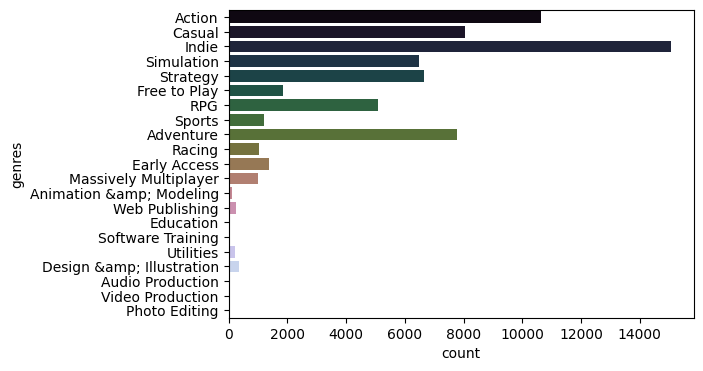

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='genres', orient='h', palette=("cubehelix"))
plt.show()

## Se concluye el top tres de generos mayor jugados

# 1.- Action
# 2.- Indie
# 3.- Casual, Adventure 


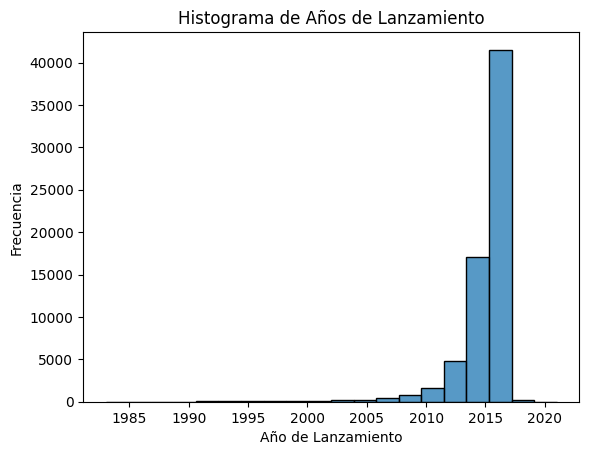

In [24]:

#Hacemos un histograma de la columna release_date
sns.histplot(df['release_date'], bins=20, kde=False)
plt.title('Histograma de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.show()



In [25]:
# obtengo la cantidad de uegos publicados por editores y desarrolladores 
developer= df["developer"].value_counts()

publisher= df["publisher"].value_counts()


developer

Ubisoft - San Francisco       2514
SmiteWorks USA, LLC           2361
DL Softworks                   495
Ronimo Games                   379
Paradox Development Studio     304
                              ... 
RailRight                        1
ARB Studios                      1
Unlikely Rogue                   1
Aerosoft,Caipirinha Games        1
Titutitech                       1
Name: developer, Length: 10512, dtype: int64

In [26]:
publisher

SmiteWorks USA, LLC          2361
Ubisoft - San Francisco      2161
KISS ltd                      762
Ubisoft                       693
Degica                        514
                             ... 
Duckman Army Games              1
Iconic Games                    1
Sons Of Earth                   1
Nicolas Pierre-Loti-Viaud       1
DK Productions                  1
Name: publisher, Length: 8348, dtype: int64

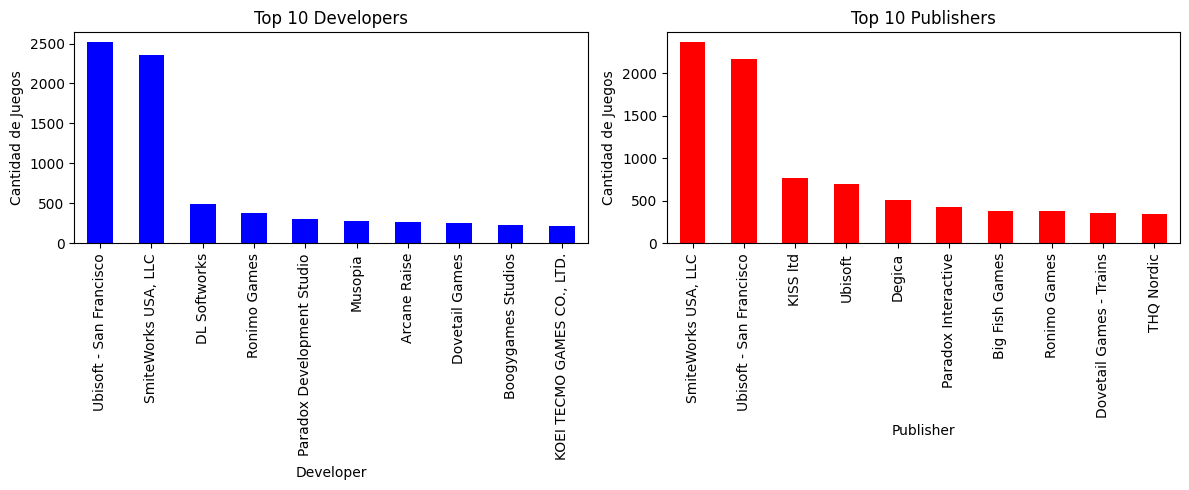

In [27]:
# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
developer[:10].plot(kind='bar', color='blue')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
publisher[:10].plot(kind='bar', color='red')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [28]:
priceStats = df['price'].describe(percentiles=[0.25, 0.75]) #Usamos el metodo describe() para un analisis preeliminar
Q1 = priceStats['25%']
Q3 = priceStats['75%']
IQR = Q3 - Q1
print("Primer Cuartil (Q1):", Q1)
print("Tercer Cuartil (Q3):", Q3)
print("Rango Intercuartil (IQR):", IQR)

Primer Cuartil (Q1): 2.99
Tercer Cuartil (Q3): 9.99
Rango Intercuartil (IQR): 7.0


In [29]:
umbralSuperior, umbralInferior = Q3 + 1.5 * IQR, Q1 - 1.5 * IQR
print("Umbral Superior:", umbralSuperior)
print("Umbral Inferior:", umbralInferior)

Umbral Superior: 20.490000000000002
Umbral Inferior: -7.51


In [30]:
outliersSuperiores = df[df['price'] > umbralSuperior]
outliersInferiores = df[df['price'] < umbralInferior]
print("Outliers Superiores:")
print(outliersSuperiores)

print("\nOutliers Inferiores:")
print(outliersInferiores)

Outliers Superiores:
                    publisher        genres                          title  \
28     Poppermost Productions  Free to Play  SNOW - All Access Legend Pass   
29     Poppermost Productions         Indie  SNOW - All Access Legend Pass   
30     Poppermost Productions    Simulation  SNOW - All Access Legend Pass   
31     Poppermost Productions        Sports  SNOW - All Access Legend Pass   
56     Poppermost Productions  Free to Play           SNOW - Lifetime Pack   
...                       ...           ...                            ...   
67382        DreamInCode B.V.        Casual                      Mesozoica   
67383        DreamInCode B.V.         Indie                      Mesozoica   
67384        DreamInCode B.V.    Simulation                      Mesozoica   
67385        DreamInCode B.V.      Strategy                      Mesozoica   
67386        DreamInCode B.V.  Early Access                      Mesozoica   

       release_date                       

C:\Users\1\AppData\Local\Temp\ipykernel_19628\2470604683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price',palette='RdBu_r')


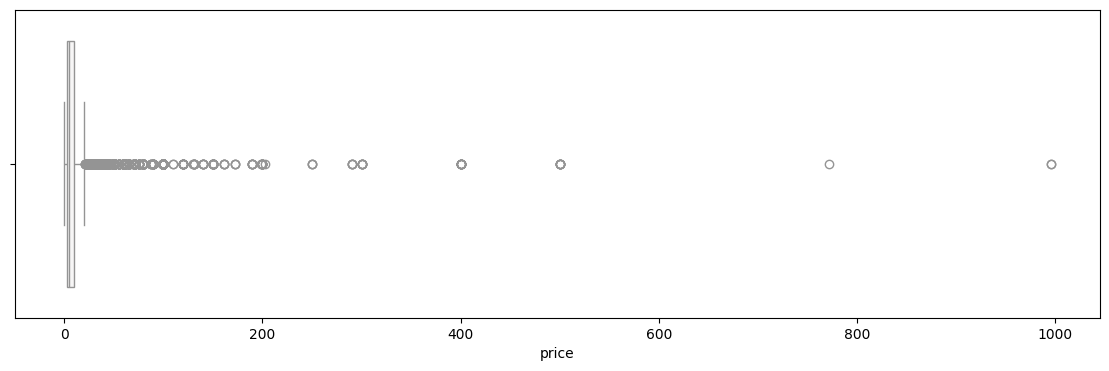

In [31]:
fig = plt.figure(figsize=(14, 4))

sns.boxplot(data=df, x='price',palette='RdBu_r')
plt.show()

Observamos el boxplot de años de lanzamiento

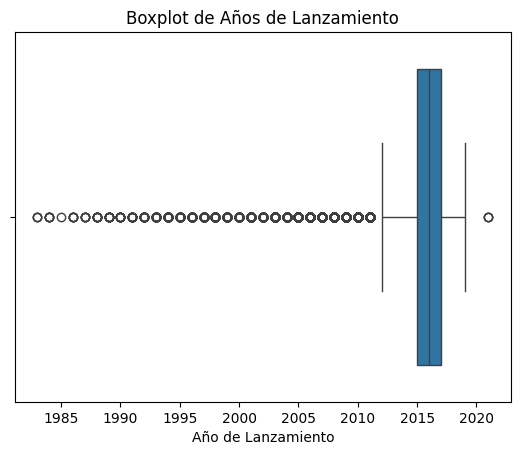

In [32]:
sns.boxplot(x=df['release_date'])
plt.title('Boxplot de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.show()

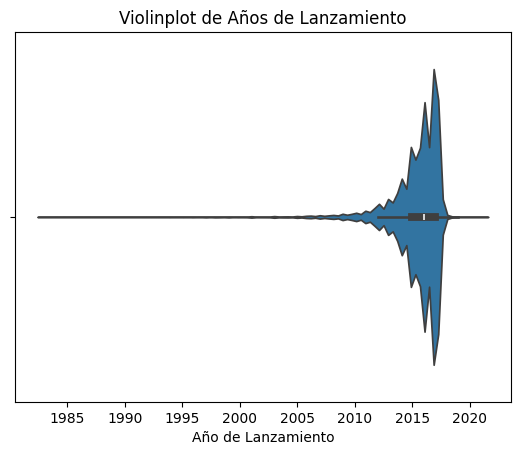

In [33]:
sns.violinplot(x=df['release_date'])
plt.title('Violinplot de Años de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.show()


Una dispersión de precio vs fecha de lanzamiento, para un detallado analisis

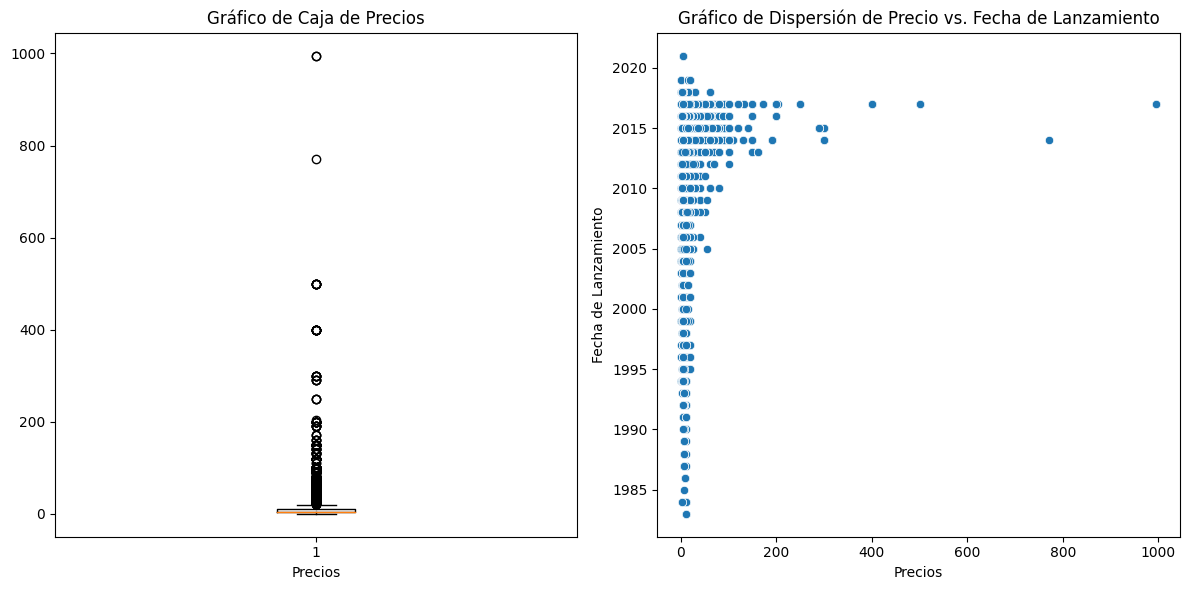

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['price'])
ax1.set_xlabel('Precios')
ax1.set_title('Gráfico de Caja de Precios')

sns.scatterplot(x=df['price'], y=df['release_date'], data=df, ax=ax2)
ax2.set_xlabel('Precios')
ax2.set_ylabel('Fecha de Lanzamiento')
ax2.set_title('Gráfico de Dispersión de Precio vs. Fecha de Lanzamiento')

plt.tight_layout()
plt.show()

## EDA del archivo analisis_sentiment

In [86]:
archivo=pd.read_parquet("../DataSets/Sentiment_Analisis.parquet")

In [87]:
archivo.head()

,user_id,funny,posted,last_edited,item_id,helpful,recommend,sentiment_analisis
0,76561197970982479,None,2011-11-05,None,1250,No ratings yet,True,2
1,76561197970982479,None,2011-07-15,None,22200,No ratings yet,True,2
2,76561197970982479,None,2011-04-21,None,43110,No ratings yet,True,2
3,js41637,None,2014-06-24,None,251610,15 of 20 people (75%) found this review helpful,True,2
4,js41637,None,2013-09-08,None,227300,0 of 1 people (0%) found this review helpful,True,2


In [37]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   funny               8127 non-null   object
 2   posted              49070 non-null  object
 3   last_edited         6123 non-null   object
 4   item_id             59161 non-null  int64 
 5   helpful             59161 non-null  object
 6   recommend           59161 non-null  bool  
 7   review              59131 non-null  object
 8   sentiment_analisis  59161 non-null  int64 
dtypes: bool(1), int64(2), object(6)
memory usage: 3.7+ MB


Creamos funciones que nos ayude con los nulos

In [88]:
def explore_null_values(parquet_file):
    """
    Explora un archivo Parquet en busca de datos nulos e informa sobre ellos.

    Parameters:
    - parquet_file: Ruta del archivo Parquet.

    Returns:
    - DataFrame que muestra las columnas con datos nulos y la cantidad de valores nulos en cada columna.
    """
 

    # Identificar columnas con valores nulos y contar la cantidad de valores nulos en cada columna
    null_info = parquet_file.isnull().sum().reset_index()
    null_info.columns = ['Columna', 'Valores Nulos']

    # Filtrar solo las columnas con valores nulos
    null_info = null_info[null_info['Valores Nulos'] > 0]

    return null_info



def drop_columns(data, column1, column2):
    """
    Elimina dos columnas específicas de un DataFrame.

    Parameters:
    - data: DataFrame con los datos.
    - column1: Nombre de la primera columna a eliminar.
    - column2: Nombre de la segunda columna a eliminar.

    Returns:
    - DataFrame después de eliminar las columnas.
    """
    # Copiar el DataFrame para no modificar el original
    cleaned_data = data.copy()

    # Eliminar las columnas especificadas
    cleaned_data.drop(columns=[column1, column2], inplace=True)

    return cleaned_data




def process_and_convert_to_int(data, column_name):
    """
    Inspecciona una columna de fechas en un DataFrame.
    Extrae solo el año de la cadena en formato de fecha, ignora los datos None y nulos,
    toma la media de los años con el entero más cercano para colocar en los valores None y nulos,
    y convierte todos los valores a tipo entero.

    Parameters:
    - data: DataFrame con los datos.
    - column_name: Nombre de la columna de fechas.

    Returns:
    - DataFrame después de procesar y convertir la columna de fechas a tipo entero.
    """
    # Copiar el DataFrame para no modificar el original
    processed_data = data.copy()

    # Extraer solo el año de la cadena en formato de fecha, ignorando None y nulos
    processed_data[column_name] = pd.to_datetime(processed_data[column_name], errors='coerce').dt.year

    # Calcular la media de los años con el entero más cercano
    mean_year = round(processed_data[column_name].mean())

    # Reemplazar los valores None y nulos con la media de los años
    processed_data[column_name] = processed_data[column_name].apply(lambda x: mean_year if pd.isnull(x) else x)

    # Convertir todos los valores a tipo entero
    processed_data[column_name] = processed_data[column_name].astype(int)

    return processed_data






def convert_int_column_to_year(data, column_name):
    """
    Convierte una columna de tipo entero a tipo fecha (date) y conserva solo el año.
    Supone que los valores en la columna representan años.

    Parameters:
    - data: DataFrame con los datos.
    - column_name: Nombre de la columna de tipo entero.

    Returns:
    - DataFrame con la columna convertida a tipo fecha y conservando solo el año.
    """
    # Copiar el DataFrame para no modificar el original
    processed_data = data.copy()

    # Convertir la columna de tipo entero a tipo fecha
    processed_data[column_name] = pd.to_datetime(processed_data[column_name], format='%Y', errors='coerce')

    # Conservar solo el año
    processed_data[column_name] = processed_data[column_name].dt.year

    return processed_data







In [89]:
explore_null_values(archivo)

,Columna,Valores Nulos
1,funny,51034
2,posted,10091
3,last_edited,53038


Se procede a limpiar los datos nulos de las columnas funny y last_edited, que representan un gran porcentaje de nuestro parquet

In [90]:
archivoLimpio=drop_columns(archivo, column1="last_edited", column2="funny")

In [91]:
explore_null_values(archivoLimpio)

,Columna,Valores Nulos
1,posted,10091


In [92]:
archivoLimpio

,user_id,posted,item_id,helpful,recommend,sentiment_analisis
0,76561197970982479,2011-11-05,1250,No ratings yet,True,2
1,76561197970982479,2011-07-15,22200,No ratings yet,True,2
2,76561197970982479,2011-04-21,43110,No ratings yet,True,2
3,js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,2
4,js41637,2013-09-08,227300,0 of 1 people (0%) found this review helpful,True,2
...,...,...,...,...,...,...
59156,Fuckfhaisjnsnsjakaka,None,70,No ratings yet,True,2
59157,3214213216,None,362890,No ratings yet,True,2
59158,ChrisCoroner,None,273110,1 of 2 people (50%) found this review helpful,True,2
59159,CaptainAmericaCw,None,730,No ratings yet,True,2


Iniciamos la conversión de la columna posted

In [93]:
sentimentAnalisis=process_and_convert_to_int(archivoLimpio, column_name="posted")

In [94]:
ArchivoFinal=convert_int_column_to_year(sentimentAnalisis, column_name="posted")

In [45]:
ArchivoFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   posted              59161 non-null  int64 
 2   item_id             59161 non-null  int64 
 3   helpful             59161 non-null  object
 4   recommend           59161 non-null  bool  
 5   review              59131 non-null  object
 6   sentiment_analisis  59161 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 2.8+ MB


convertimos nuestro archivo final a parquet para el modelo


In [95]:
ArchivoFinal.to_parquet("../DatosML/sentiment_analisis_limpio.parquet")

## Iniciamos la exploración, relación y pre procesamiento del modelo para todos los archivos

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59161 non-null  object
 1   funny        8127 non-null   object
 2   posted       49070 non-null  object
 3   last_edited  6123 non-null   object
 4   item_id      59161 non-null  int64 
 5   helpful      59161 non-null  object
 6   recommend    59161 non-null  bool  
 7   review       59131 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 3.2+ MB


In [97]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   steam_id          int64 
 5   items_count       int64 
 6   user_id           object
dtypes: int64(5), object(2)
memory usage: 272.1+ MB


In [98]:
sentimentAnalisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   posted              59161 non-null  int32 
 2   item_id             59161 non-null  int64 
 3   helpful             59161 non-null  object
 4   recommend           59161 non-null  bool  
 5   sentiment_analisis  59161 non-null  int64 
dtypes: bool(1), int32(1), int64(2), object(2)
memory usage: 2.1+ MB


In [99]:
#realizo el conteo de cada una de las categorias de sentimientos
Sentimientos= ArchivoFinal["sentiment_analisis"].value_counts()
Sentimientos

2    36879
1    13054
0     9228
Name: sentiment_analisis, dtype: int64

Distribución de sentimientos 

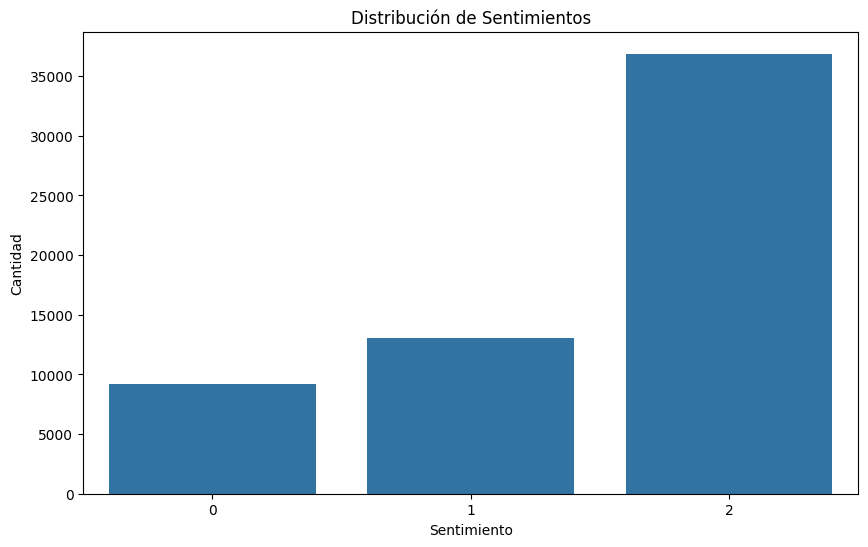

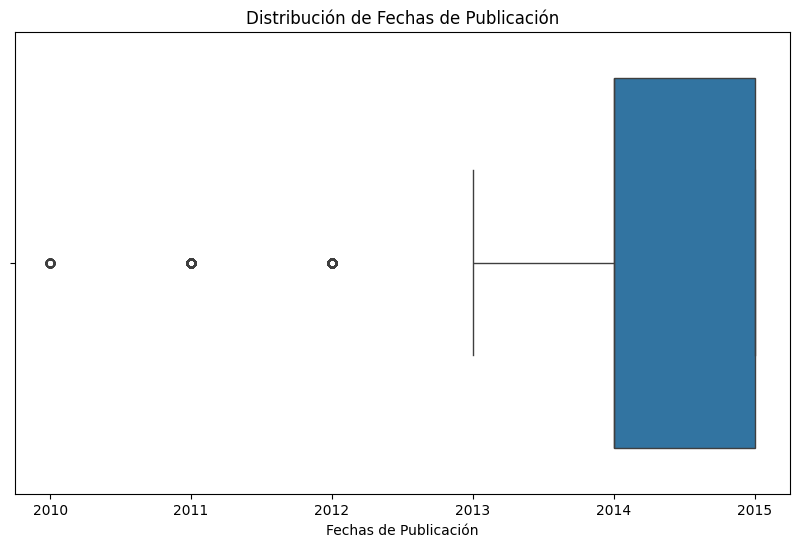

In [100]:

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_analisis', data=ArchivoFinal)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

# Estadísticas para "posted"
plt.figure(figsize=(10, 6))
sns.boxplot(x='posted', data=ArchivoFinal)
plt.title('Distribución de Fechas de Publicación')
plt.xlabel('Fechas de Publicación')
plt.show()

## Iniciamos un procesamiento del archivo Items para nustro modelo junto con su exploración

In [101]:
items=pd.read_csv("../DataSets/user_items_limpio.csv")

In [102]:
items

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479
...,...,...,...,...,...,...,...
5094100,346330,BrainBread 2,0,0,76561198329548331,7,76561198329548331
5094101,373330,All Is Dust,0,0,76561198329548331,7,76561198329548331
5094102,388490,One Way To Die: Steam Edition,3,3,76561198329548331,7,76561198329548331
5094103,521570,You Have 10 Seconds 2,4,4,76561198329548331,7,76561198329548331


In [103]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count = items.groupby('user_id')['items_count'].unique().explode()
items_count= pd.DataFrame(items_count)
items_count_user = items_count.sort_values('items_count', ascending=False)
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198092978311,1
76561198092984441,1
76561198092985047,1


C:\Users\1\AppData\Local\Temp\ipykernel_19628\1073580718.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=items_count_user, x='items_count', ax=ax2, palette="plasma")


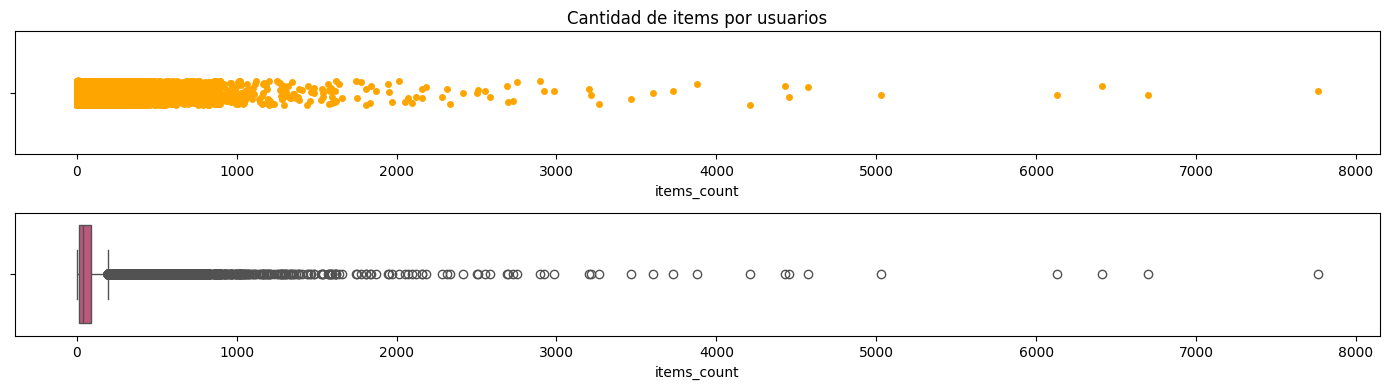

In [104]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user, x='items_count', ax=ax1, color="orange")
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user, x='items_count', ax=ax2, palette="plasma")
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Es de nuestro interes iniciar una exploración estadistica sobre el tiempo de juego y usuarios

In [105]:
#Agrupo usuarios por tiempo, lo guardo en un nuevo dataframe y ordeno 
time_count = items.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)
time_count_user

,playtime_forever
user_id,
wolop,642773
Evilutional,635295
76561198019826668,632452
76561198039832932,613411
tsunamitad,600068
...,...
76561198031798372,0
Cjixeres,0
76561198085797241,0


C:\Users\1\AppData\Local\Temp\ipykernel_14380\3739602563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=time_count_user, x='playtime_forever', ax=ax2, palette="plasma")


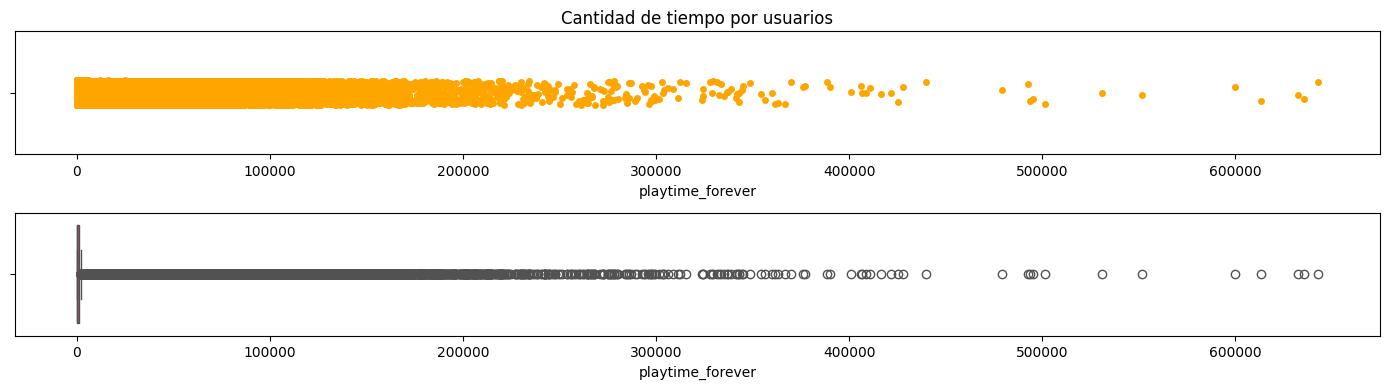

In [135]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=time_count_user, x='playtime_forever', ax=ax1, color="orange")
ax1.set_xlabel('playtime_forever') ; ax1.set_title('Cantidad de tiempo por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=time_count_user, x='playtime_forever', ax=ax2, palette="plasma")
ax2.set_xlabel('playtime_forever')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

## Tratamiento de datos para el modelo steam_Games

In [106]:
games=pd.read_parquet("../DataSets/steam_games.parquet")

In [107]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67484 entries, 0 to 67483
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     67462 non-null  object 
 1   genres        67484 non-null  object 
 2   title         67484 non-null  object 
 3   release_date  67484 non-null  int64  
 4   tags          67484 non-null  object 
 5   specs         67484 non-null  object 
 6   price         67484 non-null  float64
 7   early_access  67484 non-null  bool   
 8   id            67484 non-null  int64  
 9   developer     67484 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 4.7+ MB


Las columnas de nuestro interes son: id, title y genres, por lo que procedo a armar un dataframe con las mismas 

In [108]:
Modelo= games[["id", "title", "genres"]]
Modelo

,id,title,genres
0,761140,Lost Summoner Kitty,Action
1,761140,Lost Summoner Kitty,Casual
2,761140,Lost Summoner Kitty,Indie
3,761140,Lost Summoner Kitty,Simulation
4,761140,Lost Summoner Kitty,Strategy
...,...,...,...
67479,610660,Russian Roads,Indie
67480,610660,Russian Roads,Racing
67481,610660,Russian Roads,Simulation
67482,658870,EXIT 2 - Directions,Casual


Exploramos nuestro archivo

In [109]:
Modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67484 entries, 0 to 67483
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      67484 non-null  int64 
 1   title   67484 non-null  object
 2   genres  67484 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [110]:
#Convertimos nuestro archivo a parquet y lo exportamos en la carpeta de DataM
Modelo.to_parquet("../DatosML/ModeloGames.parquet")

---
Miscelaneos y pruebas

In [111]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
analyzer = SentimentIntensityAnalyzer() 

In [113]:
df2.tail(15)

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
59146,kimjongadam,None,None,None,413150,No ratings yet,True,I realy like this game it has gotten me to und...
59147,kimjongadam,None,None,None,242760,1 of 1 people (100%) found this review helpful,True,"Good Game Play, encountered a problem with cli..."
59148,kimjongadam,1 person found this review funny,None,None,427730,1 of 2 people (50%) found this review helpful,True,dont ask
59149,72947282842,None,None,None,280790,2 of 3 people (67%) found this review helpful,True,"Great game, specially if you need to past time..."
59150,ZaubieHunter23,None,None,None,570,No ratings yet,True,Good one
59151,ApxLGhost,None,None,None,261030,0 of 1 people (0%) found this review helpful,True,I cried in the end its so sadding ]'; I wish l...
59152,iwishihadaids,None,None,None,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...
59153,76561198261200685,1 person found this review funny,None,None,570,1 of 1 people (100%) found this review helpful,True,Well Done
59154,SenpaiDemon,None,None,None,233270,No ratings yet,True,this is a very fun and nice 80s themed shooter...
59155,snarkcornwtt,None,None,None,130,No ratings yet,True,if you liked Half life i would really recommen...
